In [1]:
import pandas as pd

In [2]:
#Disclosed City Data
cities_disc = {2018:"Cities/Cities Disclosing/2018_Cities_Disclosing_to_CDP.csv",
               2019:"Cities/Cities Disclosing/2019_Cities_Disclosing_to_CDP.csv",
               2020:"Cities/Cities Disclosing/2020_Cities_Disclosing_to_CDP.csv"}
#Response City Data
cities_resp =  {2018:"Cities/Cities Responses/2018_Full_Cities_Dataset.csv",
                2019:"Cities/Cities Responses/2019_Full_Cities_Dataset.csv",
                2020:"Cities/Cities Responses/2020_Full_Cities_Dataset.csv"}
#Disclosed Corp Data
corp_disc_water = {2018:"Corporations/Corporations Disclosing/2018_Corporates_Disclosing_to_CDP_Water_Security.csv",
                   2019:"Corporations/Corporations Disclosing/2019_Corporates_Disclosing_to_CDP_Water_Security.csv",
                   2020:"Corporations/Corporations Disclosing/2020_Corporates_Disclosing_to_CDP_Water_Security.csv"}
corp_disc_climate = {2018:"Corporations/Corporations Disclosing/Climate Change/2018_Corporates_Disclosing_to_CDP_Climate_Change.csv",
                     2019:"Corporations/Corporations Disclosing/Climate Change/2019_Corporates_Disclosing_to_CDP_Climate_Change.csv",
                     2020:"Corporations/Corporations Disclosing/Climate Change/2020_Corporates_Disclosing_to_CDP_Climate_Change.csv"}
#Response Corp Data
corp_resp_water = {2018:"Corporations/Corporations Responses/Water Security/2018_Full_Water_Security_Dataset.csv",
                   2019:"Corporations/Corporations Responses/Water Security/2019_Full_Water_Security_Dataset.csv",
                   2020:"Corporations/Corporations Responses/Water Security/2020_Full_Water_Security_Dataset.csv"}
corp_resp_climate = {2018:"Corporations/Corporations Responses/Climate Change/2018_Full_Climate_Change_Dataset.csv",
                     2019:"Corporations/Corporations Responses/Climate Change/2019_Full_Climate_Change_Dataset.csv",
                     2020:"Corporations/Corporations Responses/Climate Change/2020_Full_Climate_Change_Dataset.csv"}

## Top 30 Countries we could focus on

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(pd.read_csv(cities_resp[2020])['Country'].value_counts()[:30])


United States of America                                226861
Brazil                                                   90308
Canada                                                   47467
United Kingdom of Great Britain and Northern Ireland     39111
Mexico                                                   39052
Portugal                                                 28289
Argentina                                                23229
Italy                                                    23101
Colombia                                                 23079
Denmark                                                  20697
Peru                                                     19779
Australia                                                18675
Costa Rica                                               16061
Sweden                                                   15570
South Africa                                             14806
Indonesia                                              

In [109]:
pd.read_csv(cities_resp[2020]).isna().sum()

Questionnaire                0
Year Reported to CDP         0
Account Number               0
Organization                 0
Country                      0
CDP Region                   0
Parent Section          205345
Section                      0
Question Number              0
Question Name                0
Column Number                0
Column Name              28719
Row Number                   0
Row Name                464481
Response Answer         166288
Comments                849190
File Name               867527
Last update                  0
dtype: int64

## Chosing US, Brazil, and UK currently so we have one from 3 different contients with a large amount of data each

In [4]:
chosen_countries = {"United States of America", "Brazil", "United Kingdom of Great Britain and Northern Ireland"}

three_count = pd.read_csv(cities_resp[2020])
print("original shape",three_count.shape)
three_count = three_count[three_count.apply(lambda x: True if x['Country'] in chosen_countries else False, axis = 1)]
print("new shape",three_count.shape)

original shape (869313, 18)
new shape (356280, 18)


## Possible independent Variables
Qualifications: 
1. In the "CDP Reccomended Questions to focus on" Dataset  
2. Able to be one-hot encoded
2. Have a reasonable amount of responses  

The following 5 match this, but we need to make sure there is a a fair amount of responses


**Q1 (C1.0)**
- Does your city incorporate sustainability goals and targets (e.g. GHG reductions) into the master planning for the city?  

**Q2 (C2.0)**  
- Has a climate change risk or vulnerability assessment been undertaken for the city area?

**Q3 (C4.0)**  
- Does your city have a city-wide emissions inventory to report?

**Q4 (C5.0)**  
- Do you have a GHG emissions reduction target in place at the city-wide level?

**Q5 (C8.0)**  
- Does your city have a renewable energy or electricity target?

## Revisions
After checking all the questions' data, they match the needs we have, except for Q4 (C5.0), it SEEMED like a Y/N question, but it wasn't, and it wasn't on a scale that could be reasonably one hot encoded

In [5]:
len(three_count['Country'])

356280

In [6]:
question_numbers = ["1.0","2.0","4.0","8.0"]
years = [2018, 2019, 2020]
response_proportions = {"United States of America":{"1.0":[],"2.0":[],"4.0":[],"8.0":[]}, 
                        "Brazil":{"1.0":[],"2.0":[],"4.0":[],"8.0":[]}, 
                        "United Kingdom of Great Britain and Northern Ireland":{"1.0":[],"2.0":[],"4.0":[],"8.0":[]}}


for y in years:
    curr_year = pd.read_csv(cities_resp[y])
    three_count = curr_year[curr_year.apply(lambda x: True if x['Country'] in chosen_countries else False, axis = 1)]
    print()
    print('Year: ', y,"-------------------------------------------------------------------")
    for q in question_numbers:
        q_specific = three_count[(three_count['Question Number'] == q)]
        print("df length for Q", q,": ", len(q_specific))

        for nation in chosen_countries:
            both = q_specific[q_specific['Country'] == nation]
            total_length = len(both)
            total_yes = sum(both['Response Answer'] == 'Yes')
            proportion =  total_yes/total_length
            print("   -Total Yes for ", nation,": ", total_yes, "--- Proportion =", proportion)
            response_proportions[nation][q] += [round(proportion,3)]
    # progress[y] = response_proportions


Year:  2018 -------------------------------------------------------------------
df length for Q 1.0 :  206
   -Total Yes for  Brazil :  0 --- Proportion = 0.0
   -Total Yes for  United States of America :  0 --- Proportion = 0.0
   -Total Yes for  United Kingdom of Great Britain and Northern Ireland :  0 --- Proportion = 0.0
df length for Q 2.0 :  210
   -Total Yes for  Brazil :  14 --- Proportion = 0.21212121212121213
   -Total Yes for  United States of America :  67 --- Proportion = 0.49264705882352944
   -Total Yes for  United Kingdom of Great Britain and Northern Ireland :  7 --- Proportion = 0.875
df length for Q 4.0 :  206
   -Total Yes for  Brazil :  41 --- Proportion = 0.640625
   -Total Yes for  United States of America :  112 --- Proportion = 0.8296296296296296
   -Total Yes for  United Kingdom of Great Britain and Northern Ireland :  5 --- Proportion = 0.7142857142857143
df length for Q 8.0 :  206
   -Total Yes for  Brazil :  7 --- Proportion = 0.109375
   -Total Yes for  U

In [7]:
pd.DataFrame(response_proportions)

,United States of America,Brazil,United Kingdom of Great Britain and Northern Ireland
1.0,"[0.0, 0.713, 0.764]","[0.0, 0.416, 0.485]","[0.0, 0.75, 0.692]"
2.0,"[0.493, 0.632, 0.736]","[0.212, 0.238, 0.279]","[0.875, 0.562, 0.5]"
4.0,"[0.83, 0.76, 0.826]","[0.641, 0.257, 0.338]","[0.714, 0.812, 0.846]"
8.0,"[0.585, 0.55, 0.611]","[0.109, 0.099, 0.088]","[0.714, 0.375, 0.423]"


## Revisions pt 2
- Removing C1.0 as it has no data for each country in 2018  

## Conclusions?
- C2.0 has positive slope for all but UK
- C4.0 is different for each, no real patterns
- C8.0 follows the same kinds of directions as C4.0, maybe this is what we investigate?

# Importing in data for the dependent variable
Data from: https://www.icos-cp.eu/science-and-impact/global-carbon-budget/2020  
- Data was reformatted from an XLSX file and cleaned to only include the data we're interested in and able to study

Could have used US: https://aqs.epa.gov/aqsweb/airdata/download_files.html#Annual  
And also UK: https://uk-air.defra.gov.uk/data/pcm-data  
But had issues finding a similar one for Brazil and others  


In [8]:
pollution = pd.read_csv('country_data.csv', index_col = 'Year')

<AxesSubplot:xlabel='Year'>

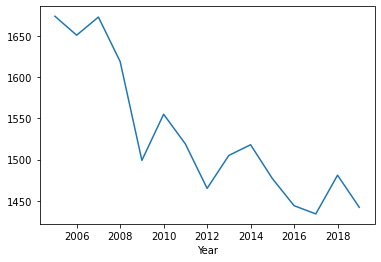

In [9]:
#pollution['USA'].plot()
pollution.loc[2005:,:]['USA'].plot()

<AxesSubplot:xlabel='Year'>

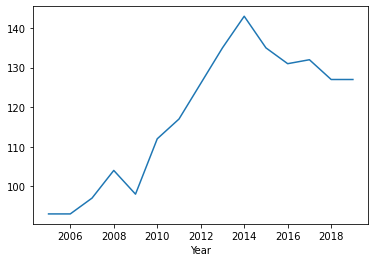

In [10]:
pollution.loc[2005:,:]['Brazil'].plot()

<AxesSubplot:xlabel='Year'>

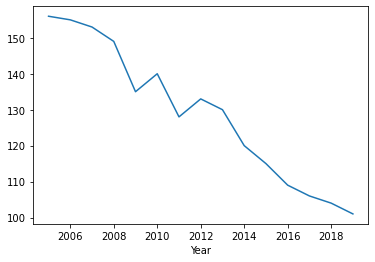

In [11]:
pollution.loc[2005:,:]['United Kingdom'].plot()

## Now lets do some testing

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

### Our Independent Variable

In [13]:
response_df = pd.DataFrame(response_proportions)
response_df

,United States of America,Brazil,United Kingdom of Great Britain and Northern Ireland
1.0,"[0.0, 0.713, 0.764]","[0.0, 0.416, 0.485]","[0.0, 0.75, 0.692]"
2.0,"[0.493, 0.632, 0.736]","[0.212, 0.238, 0.279]","[0.875, 0.562, 0.5]"
4.0,"[0.83, 0.76, 0.826]","[0.641, 0.257, 0.338]","[0.714, 0.812, 0.846]"
8.0,"[0.585, 0.55, 0.611]","[0.109, 0.099, 0.088]","[0.714, 0.375, 0.423]"


In [14]:
usa_x = np.array(response_df['United States of America'].to_list()).T
braz_x = np.array(response_df['Brazil'].to_list()).T
uk_x = np.array(response_df['United Kingdom of Great Britain and Northern Ireland'].to_list()).T

### Our dependent Variable

In [15]:
usa_y = pollution.loc[2017:,:]['USA'].to_numpy()
braz_y = pollution.loc[2017:,:]['Brazil'].to_numpy()
uk_y = pollution.loc[2017:,:]['United Kingdom'].to_numpy()

### Explanation
- each row is data for a different year
- each column is data for each question
- we are going to perform *linear regression* with the question outputs as variables
- Goal is to see which one has the highest weights
- or see if it even regresses well for the countries

In [16]:
usa_x

array([[0.   , 0.493, 0.83 , 0.585],
       [0.713, 0.632, 0.76 , 0.55 ],
       [0.764, 0.736, 0.826, 0.611]])

In [17]:
usa_y

array([1434, 1481, 1442], dtype=int64)

## Doing it

In [18]:
reg = LinearRegression().fit(usa_x, usa_y)
reg.coef_

array([  81.63854985, -209.94635941, -178.5253416 , -156.49954292])

In [19]:
reg = LinearRegression().fit(braz_x, braz_y)
reg.coef_

array([-6.57642645, -0.46429426,  5.8604647 ,  0.17165013])

In [20]:
reg = LinearRegression().fit(uk_x, uk_y)
reg.coef_

array([  5.93425586,  27.42534785, -13.64691836, -10.23846603])

### Analysis
Rank of weights:  
- USA: w2, w3, w4, w1
- Brazil: w1, w3, w2, w4
- UL: w2, w3, w4, w1

Weights 2 and 3 seem to be the most consistent, as well as being mostly **negative**  
**Negative** is very important, because that indicates that the model suggests the **decrease polution**

### Relating back to the questions
So what are these questions even asking again?  
w2 relates to C2.0 and w3 relates to C4.0

**Q2 (C2.0)**

Has a climate change risk or vulnerability assessment been undertaken for the city area?

**Q3 (C4.0)**

Does your city have a city-wide emissions inventory to report?

### Conclusion
It's honestly pretty close to exepctations. These questions directly relate to the data we imported, while the others are more focused on greenhouse gasses. The issue we have though is that we did regression on basically no data. It's clear that this outcome should be taken lightly, but does lead us closer to a direction we should focus on. It matched our intuition, while also providing iteresting numerical insight

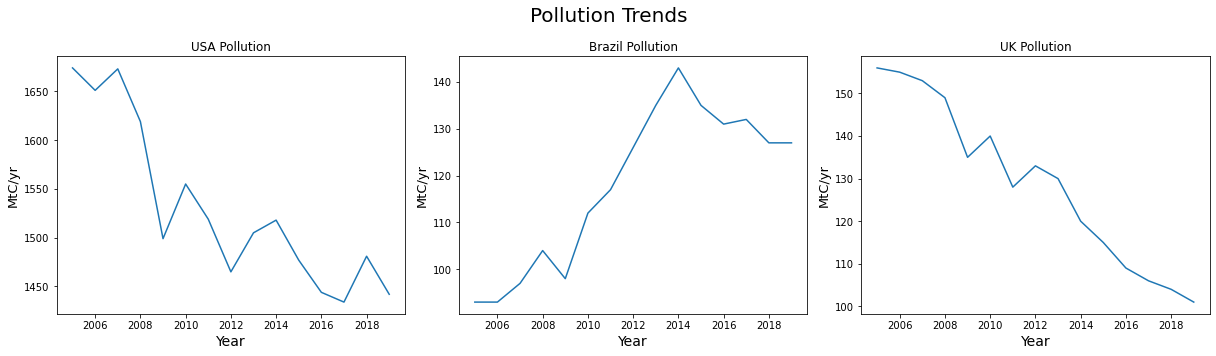

In [102]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(17)
axs[0].plot(pollution.loc[2005:,:]['USA'])
axs[1].plot(pollution.loc[2005:,:]['Brazil'])
axs[2].plot(pollution.loc[2005:,:]['United Kingdom'])

axs[0].set_ylabel("MtC/yr", fontsize=13)
axs[1].set_ylabel("MtC/yr", fontsize=13)
axs[2].set_ylabel("MtC/yr", fontsize=13)

axs[0].set_xlabel("Year", fontsize=14)
axs[1].set_xlabel("Year", fontsize=14)
axs[2].set_xlabel("Year", fontsize=14)
fig.suptitle('Pollution Trends', fontsize=20)
axs[0].set_title('USA Pollution')
axs[1].set_title('Brazil Pollution')
axs[2].set_title('UK Pollution')
fig.tight_layout()
fig.savefig('viz1.png', dpi=fig.dpi)

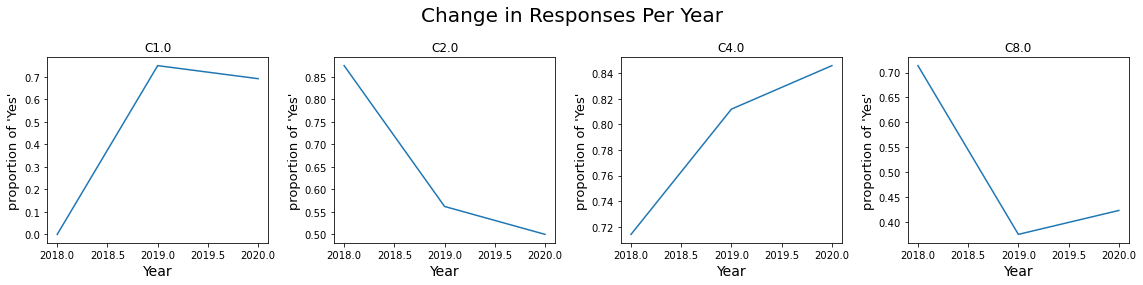

In [103]:
plot_data = response_df['United Kingdom of Great Britain and Northern Ireland'].to_list()
fig, axs = plt.subplots(1,4)
fig.set_figheight(4)
fig.set_figwidth(16)
labels = ['C1.0','C2.0','C4.0','C8.0']
fig.suptitle('Change in Responses Per Year', fontsize=20)
for i in range(len(plot_data)):
    data = pd.Series(plot_data[i], index = [2018,2019,2020])
    axs[i].plot(data)
    axs[i].set_ylabel("proportion of 'Yes'", fontsize=13)
    axs[i].set_xlabel("Year", fontsize=14)
    axs[i].set_title(labels[i])
fig.tight_layout()
#fig.savefig('viz2.png', dpi=fig.dpi)

In [104]:
response_df

,United States of America,Brazil,United Kingdom of Great Britain and Northern Ireland
1.0,"[0.0, 0.713, 0.764]","[0.0, 0.416, 0.485]","[0.0, 0.75, 0.692]"
2.0,"[0.493, 0.632, 0.736]","[0.212, 0.238, 0.279]","[0.875, 0.562, 0.5]"
4.0,"[0.83, 0.76, 0.826]","[0.641, 0.257, 0.338]","[0.714, 0.812, 0.846]"
8.0,"[0.585, 0.55, 0.611]","[0.109, 0.099, 0.088]","[0.714, 0.375, 0.423]"


In [94]:
pd.Series([0.0, 0.75, 0.692], index = [2018,2019,2020])

2018    0.000
2019    0.750
2020    0.692
dtype: float64

In [116]:
pollution.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Asia', 'Central America', 'Europe', 'Middle East', 'North America',
       'Oceania', 'South America', 'Bunkers', 'Statistical Difference',
       'World'],
      dtype='object', length=233)